## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is **identifying and attracting the right talent**, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can **help in shortlisting the candidates having higher chances of VISA approval**. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants **for whom the visa should be certified or denied** based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [45]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [46]:
import numpy as np, pandas as pd, sklearn, xgboost
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print({
    "sklearn": sklearn.__version__,
    "xgboost": xgboost.__version__,
    "random_state": RANDOM_STATE
})

{'sklearn': '1.5.2', 'xgboost': '2.0.3', 'random_state': 42}


**Problem**: Predict visa certification to prioritize reviews.

**Target**: `case_status` (Certified=1, Denied=0).

**Primary metric**: `F1` (business: balance FP/FN).

**Secondary**: Precision, Recall, Accuracy.

## Import Dataset

In [47]:
# #import data from google drive
# from google.colab import drive
# drive.mount('/content/drive')

# #load dataframe
# df = pd.read_csv('/content/drive/MyDrive/Colab/AML Proj 3/EasyVisa.csv')

# upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("EasyVisa.csv")

Saving EasyVisa.csv to EasyVisa (4).csv


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [48]:
display(df.head())

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [49]:
display(df.tail())

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [50]:
print(df.shape)
print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")

(25480, 12)
Rows: 25,480  |  Columns: 12


#### Check the data types of the columns for the dataset

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [52]:
# Duplicate primary keys (sanity)
if 'case_id' in df.columns:
    dup_cnt = df['case_id'].duplicated().sum()
    print(f"Duplicate case_id: {dup_cnt}")

Duplicate case_id: 0


In [53]:
# Missingness table
mis = (
    df.isna().sum()
      .to_frame('missing')
      .assign(pct=lambda x: (x['missing']/len(df)).round(4)*100)
      .sort_values('missing', ascending=False)
)
display(mis)

,missing,pct
case_id,0,0.0
continent,0,0.0
education_of_employee,0,0.0
has_job_experience,0,0.0
requires_job_training,0,0.0
no_of_employees,0,0.0
yr_of_estab,0,0.0
region_of_employment,0,0.0
prevailing_wage,0,0.0
unit_of_wage,0,0.0


In [54]:
# Numeric summary (add missing & nunique for convenience)
num_cols = df.select_dtypes(include=np.number).columns
num_summary = df[num_cols].describe().T
num_summary['missing'] = df[num_cols].isna().sum()
num_summary['nunique'] = df[num_cols].nunique()
display(num_summary)

,count,mean,std,min,25%,50%,75%,max,missing,nunique
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00,0,7105
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00,0,199
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27,0,25454


In [55]:
# Categorical summary
cat_cols = df.select_dtypes(include=['object','category','bool']).columns
cat_summary = df[cat_cols].describe().T
cat_summary['missing'] = df[cat_cols].isna().sum()
cat_summary['nunique'] = df[cat_cols].nunique()
display(cat_summary)

,count,unique,top,freq,missing,nunique
case_id,25480,25480,EZYV01,1,0,25480
continent,25480,6,Asia,16861,0,6
education_of_employee,25480,4,Bachelor's,10234,0,4
has_job_experience,25480,2,Y,14802,0,2
requires_job_training,25480,2,N,22525,0,2
region_of_employment,25480,5,Northeast,7195,0,5
unit_of_wage,25480,4,Year,22962,0,4
full_time_position,25480,2,Y,22773,0,2
case_status,25480,2,Certified,17018,0,2


#### Fixing the negative values in number of employees columns

In [56]:
# display negative # of employees
display(df[df['no_of_employees'] < 0].head(10))

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.32,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.95,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.50,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.61,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.51,Year,Y,Certified


In [57]:
if 'no_of_employees' in df.columns:
    # Step 1: Flag and remove invalid negatives
    neg_mask = df['no_of_employees'] < 0
    print(f"Negative employee counts: {neg_mask.sum()}")
    df.loc[neg_mask, 'no_of_employees'] = np.nan

    # Step 2: Impute with median of valid values
    median_emp = df.loc[df['no_of_employees'].ge(0), 'no_of_employees'].median()
    df['no_of_employees'] = df['no_of_employees'].fillna(median_emp)

    print(f"Median used: {median_emp}")

Negative employee counts: 33
Median used: 2112.0


The no_of_employees feature contained 33 negative values, which are invalid and were set to missing.

Missing values were imputed with the median of valid counts (2,112 employees) to avoid distortion from extreme outliers.

#### Let's check the count of each unique category in each of the categorical variables

In [58]:
def freq_table(s: pd.Series, top=None):
    """Count + percent table (optionally top N)."""
    vc = s.value_counts(dropna=False)
    if top is not None:
        vc = vc.head(top)
    out = pd.DataFrame({
        'count': vc,
        'percent': (vc / len(s) * 100).round(2)
    })
    return out

# Display full frequency tables (or set top=10 to avoid long scrolls)
for c in cat_cols:
    print(f"\n=== {c} ===")
    display(freq_table(df[c], top=10))


=== case_id ===


,count,percent
EZYV01,1,0.0
EZYV16995,1,0.0
EZYV16993,1,0.0
EZYV16992,1,0.0
EZYV16991,1,0.0
EZYV16990,1,0.0
EZYV16989,1,0.0
EZYV16988,1,0.0
EZYV16987,1,0.0
EZYV16986,1,0.0



=== continent ===


,count,percent
Asia,16861,66.17
Europe,3732,14.65
North America,3292,12.92
South America,852,3.34
Africa,551,2.16
Oceania,192,0.75



=== education_of_employee ===


,count,percent
Bachelor's,10234,40.16
Master's,9634,37.81
High School,3420,13.42
Doctorate,2192,8.60



=== has_job_experience ===


,count,percent
Y,14802,58.09
N,10678,41.91



=== requires_job_training ===


,count,percent
N,22525,88.4
Y,2955,11.6



=== region_of_employment ===


,count,percent
Northeast,7195,28.24
South,7017,27.54
West,6586,25.85
Midwest,4307,16.90
Island,375,1.47



=== unit_of_wage ===


,count,percent
Year,22962,90.12
Hour,2157,8.47
Week,272,1.07
Month,89,0.35



=== full_time_position ===


,count,percent
Y,22773,89.38
N,2707,10.62



=== case_status ===


,count,percent
Certified,17018,66.79
Denied,8462,33.21


### Univariate Analysis

In [59]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [60]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature, # Added hue
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        legend=False # Added legend=False
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

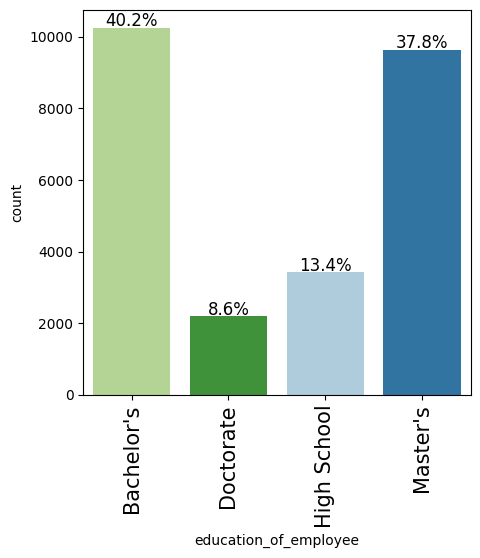

In [61]:
labeled_barplot(df, 'education_of_employee', perc=True)

#### Observations on region of employment

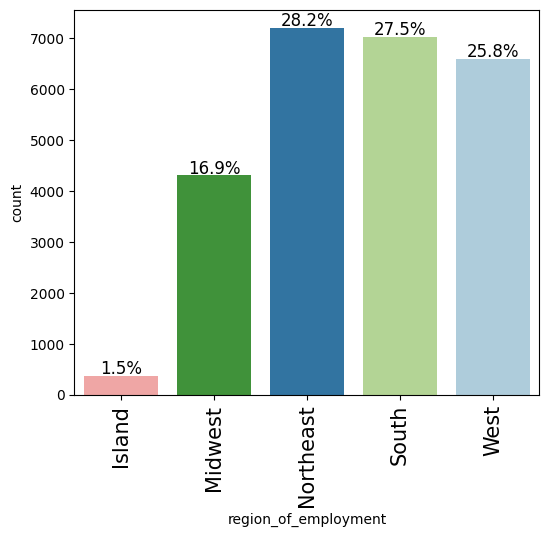

In [62]:
labeled_barplot(df, 'region_of_employment', perc=True)

#### Observations on job experience

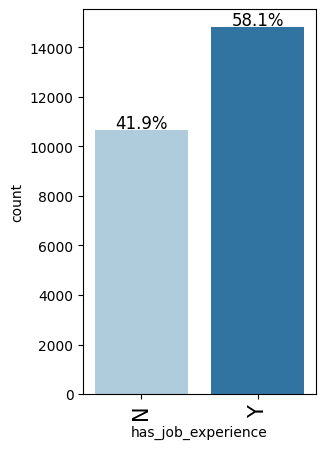

In [63]:
labeled_barplot(df, 'has_job_experience', perc=True)

#### Observations on case status

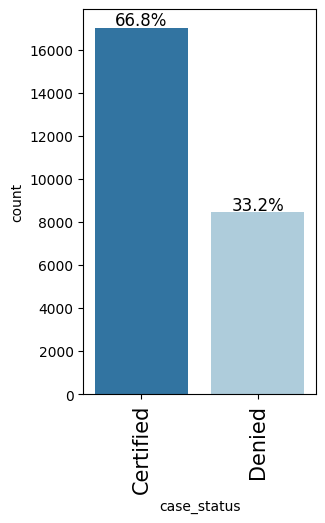

In [64]:
labeled_barplot(df, 'case_status', perc=True)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [65]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow", hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        hue=target,
    )

    plt.tight_layout()
    plt.show()

In [66]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

The answer to this question isn't quite straight forward.

While visa approval rates do increase with higher education, the relationship with wages is less straightforward.

- Doctorate holders have the highest approval rate (~87%) but not the highest median annual wage
- High school graduates show a surprisingly high wage spread
- Education level is a strong predictor for approval likelihood, but wage differences across education groups are influenced by other factors

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


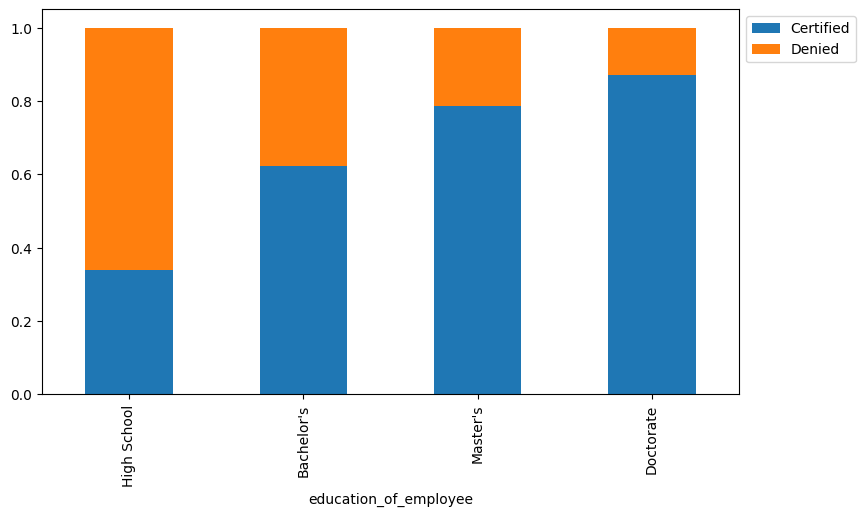

In [67]:
stacked_barplot(df, 'education_of_employee', 'case_status')

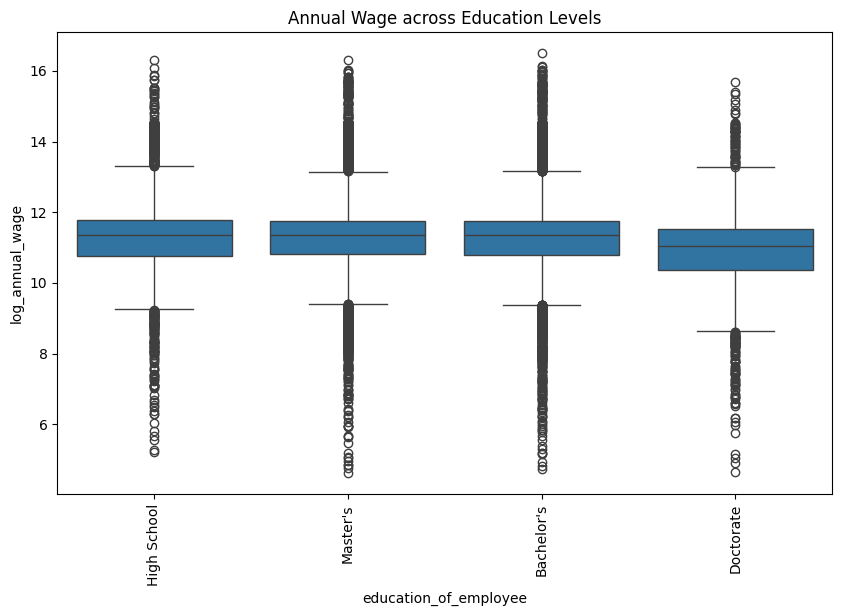

In [235]:
# plot education of employee with prevailing_wage normalized via unit of wage to annual income
df_cp = df.copy(deep=True)

df_cp['annual_wage'] = df_cp['prevailing_wage'] * df_cp['unit_of_wage'].map({'Year': 1, 'Month': 12, 'Week': 52, 'Hour': 2080})

#log transform annual_wage
df_cp['log_annual_wage'] = np.log1p(df_cp['annual_wage'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cp, x='education_of_employee', y='log_annual_wage')
plt.xticks(rotation=90)
plt.title('Annual Wage across Education Levels')
plt.show()


#### How does visa status vary across different continents?

- Asia has the highest number of applications and a ~65% approval rate.

- Europe shows the highest approval rate (80%), followed by Africa (72%) but much lower applicant counts compared to Asia.

- South America has the lowest approval rate (~58%).

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


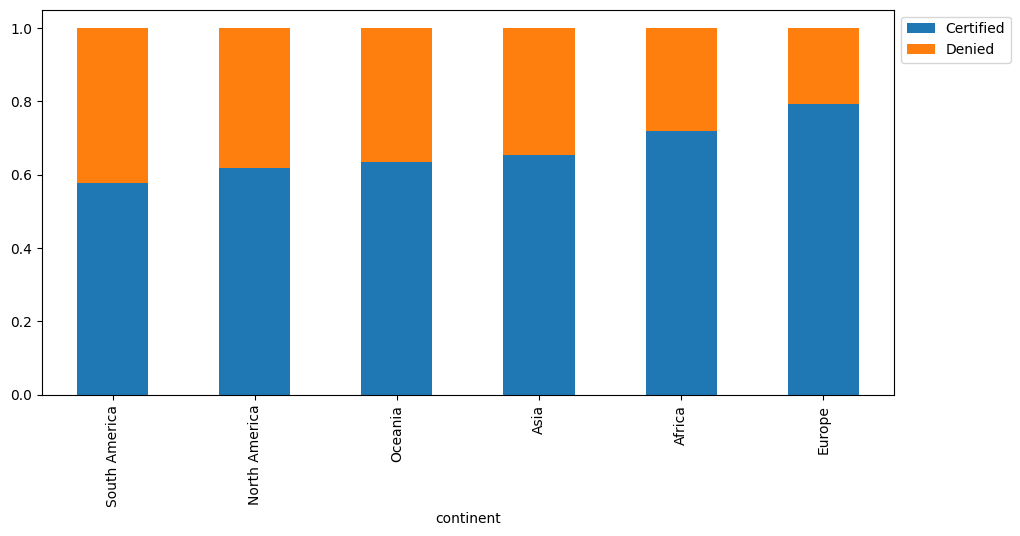

In [68]:
stacked_barplot(df, 'continent', 'case_status')

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

Yes. Applicants with prior experience have ~18 percent higher approval rate (74% vs 56%).

This suggests work experience is a strong positive factor.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


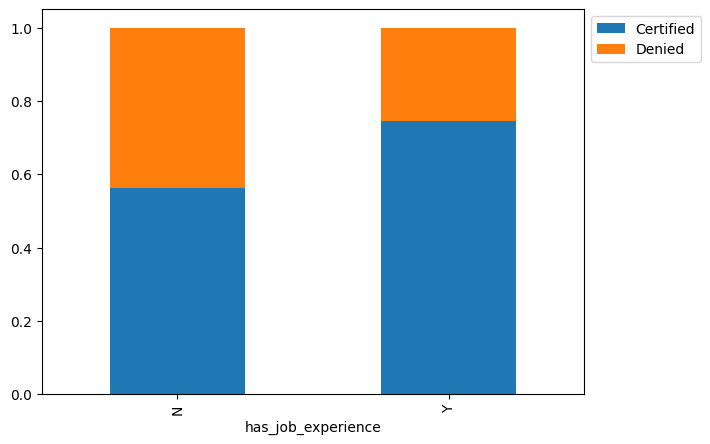

In [69]:
stacked_barplot(df, 'has_job_experience', 'case_status')

#### Is the prevailing wage consistent across all regions of the US?

No. The regional medians are relatively close:

- Midwest and South show slightly higher medians.

- All regions have wide spreads and extreme outliers.
These differences likely reflect regional concentrations

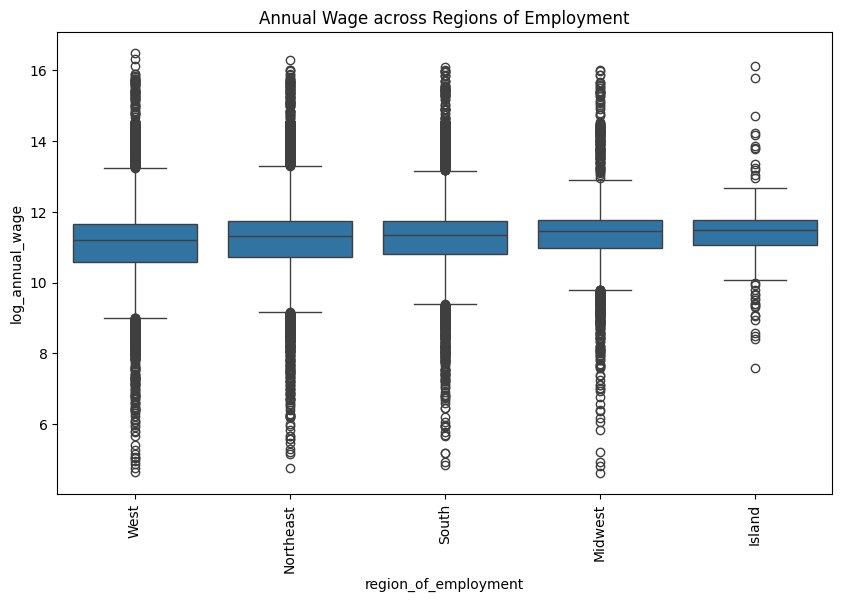

In [241]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region_of_employment', y='log_annual_wage')
plt.xticks(rotation=90)
plt.title('Annual Wage across Regions of Employment')
plt.show()

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

The data suggests only a weak relationship between wage and visa approval.

- Most approved and denied applications cluster in the same wage range

- There is a slight tendency for approved applications to be closer to the median wage and for denials to be slightly closer to very high wages.

- This indicates that wage alone is not a strong determinant of case status.

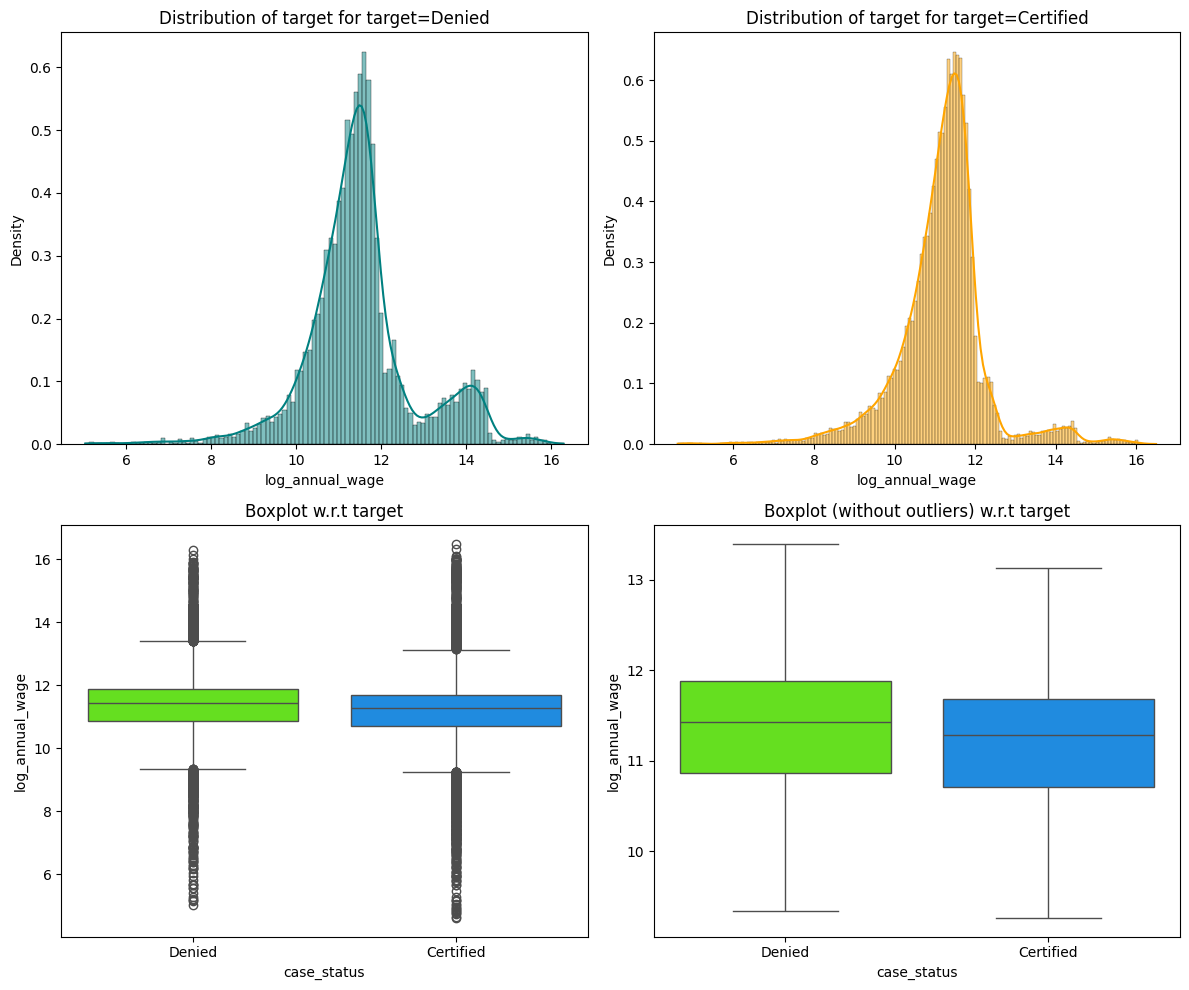

In [239]:
distribution_plot_wrt_target(df_cp, 'log_annual_wage', 'case_status')

<Axes: xlabel='log_annual_wage', ylabel='Density'>

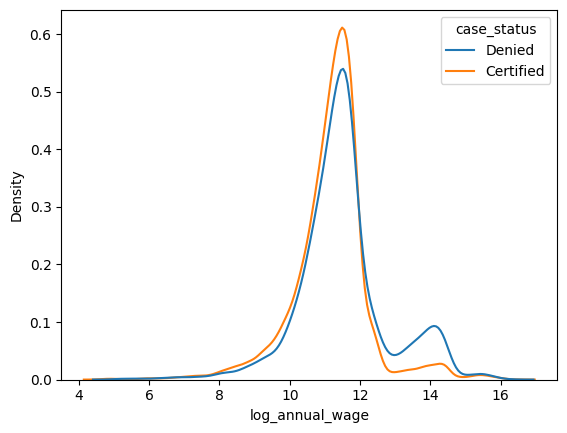

In [244]:
#even normalized log transformed data is hard to read... using KDE
sns.kdeplot(data=df, x="log_annual_wage", hue="case_status", common_norm=False)

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

Yes. Even after converting all wages to annual terms for comparison, job offers originally expressed as annual salaries have the highest approval rates.

Hourly-based offers still have notably lower approval rates.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


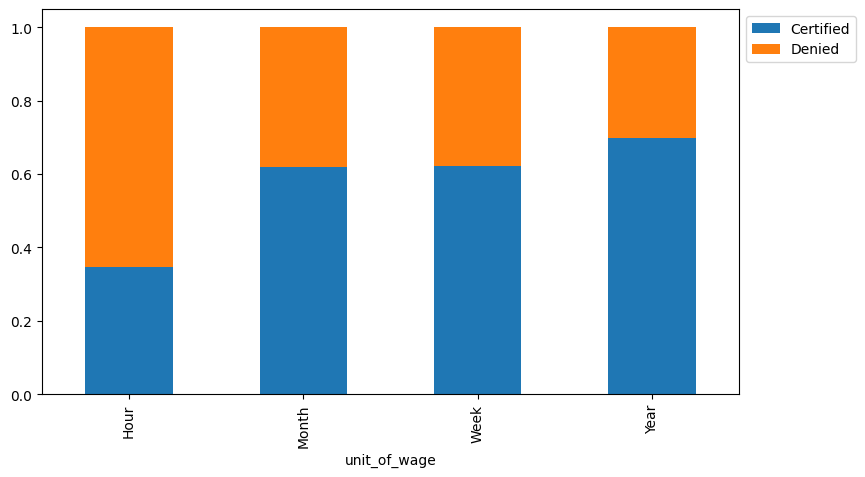

In [72]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

## Data Pre-processing

## Outlier Check

--- Outlier check for no_of_employees ---


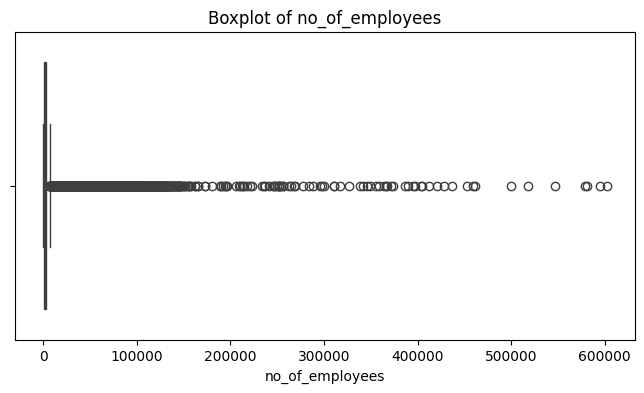

--- Outlier check for yr_of_estab ---


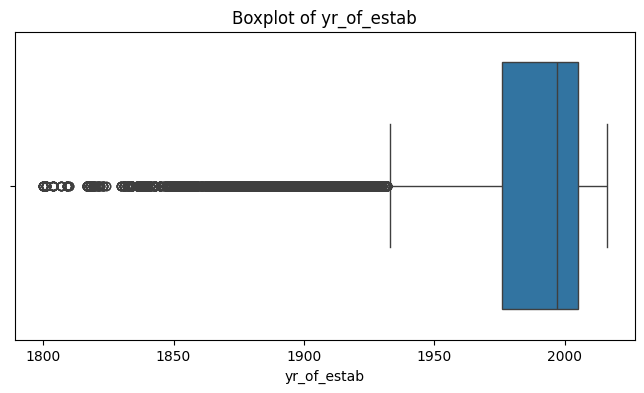

--- Outlier check for prevailing_wage ---


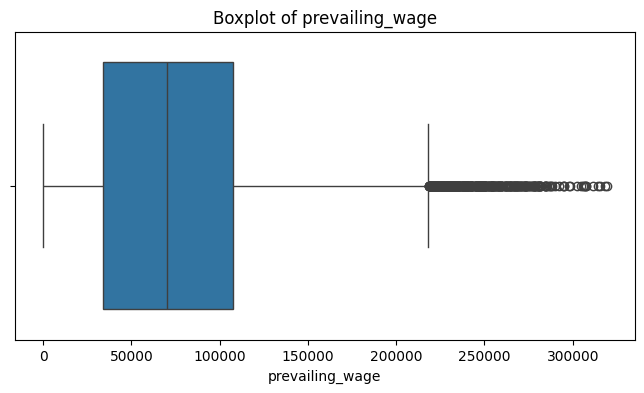

In [73]:
# Check for outliers in numerical columns using boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    print(f"--- Outlier check for {col} ---")
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Data Preparation for modeling

This section transforms the raw dataset into a **clean, model-ready matrix** while preventing data leakage. The goal is to standardize units, engineer business-meaningful features, handle missing values/outliers, and encode categories.

And this is all **inside pipelines** so the same logic applies to train and test.

###  Imports, constants, and reproducibility

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Wage unit → annual multiplier
WAGE_MULT = {'Hour': 2080, 'Week': 52, 'Month': 12, 'Year': 1}

# Reference year for company age
REF_YEAR = 2016

### Drop IDs, normalize wages, engineer company age, Y/N to 0/1

In [75]:
# ---------------------------------------
# 1) Keep original cleaned base dataset
# ---------------------------------------
df_base = df.copy(deep=True)

# Drop case_id if present
if 'case_id' in df_base.columns:
    df_base = df_base.drop(columns=['case_id'])

# Minimal cleaning only — binary Y/N → numeric
for col in ['has_job_experience', 'requires_job_training', 'full_time_position']:
    if col in df_base.columns:
        df_base[col] = df_base[col].map({'Y': 1, 'N': 0}).astype('float')

# Mark negatives as NaN but do not create engineered features
if 'no_of_employees' in df_base.columns:
    neg_mask = df_base['no_of_employees'] < 0
    df_base.loc[neg_mask, 'no_of_employees'] = np.nan

### Collapse rare categories (to keep OHE tidy)

In [76]:
def collapse_rare(s: pd.Series, min_frac=0.01):
    vc = s.value_counts(normalize=True, dropna=False)
    rare = vc[vc < min_frac].index
    return s.where(~s.isin(rare), other='Other')

for c in ['continent', 'education_of_employee', 'region_of_employment']:
    if c in df_base.columns:
        df_base[c] = collapse_rare(df_base[c], min_frac=0.01)


## Additional Feature Engineering

This additional feature engineering via **log transformation** to our numerical feature in the dataset. This transofmration will address the particular issue with skewed distrbution like:
*  **large number of employees** (mega large companies)
*  **uncommonly high earners** (most make less)
*  and **uncommonly old companies** (most companies are new)

While these techniques are more common in linear models and this project will leverage advanced modeling like GradientBoosting and RandomForest, the reason I am adding these changes is to show the difference between adding these features vs not adding them.

This will highlight the **benefits of advanced modeling technology that can pick up these nuances of our features without the manual work of us decoding them** in prior to training.

You can read this section for the rationale but feel free to skip to the results and observations at the end

In [87]:
# ------------------------
# Create engineered copy
# ------------------------
df_eng = df_base.copy(deep=True)

### yr_of_estab

**Issue**: Years as far back as the 1800s — probably data entry errors or special cases.

**Action**:

1.   Convert year established to company age
2.   Cap age at 200 years (plenty for the oldest real companies).
3.   Drop the original yr_of_estab to avoid leakage or confusion.
Reason: Age is more interpretable for modeling, and capping prevents ancient values from skewing statistics.

In [88]:
# --- Company age from yr_of_estab ---
REF_YEAR = 2016  # replace with actual reference year of dataset
if 'yr_of_estab' in df_eng.columns:
    df_eng['company_age'] = (REF_YEAR - df_eng['yr_of_estab']).clip(lower=0, upper=200)
    df_eng = df_eng.drop(columns=['yr_of_estab'], errors='ignore')

### no_of_employees
**Step**: Keep raw values, fix negatives (set to NaN, impute median), add `log_no_of_employees` as an extra column.

**Why**: Large companies might be valid and predictive. Log transformation reduces skew for linear models, raw version works fine for tree models.

In [89]:
# --- Employee counts ---
if 'no_of_employees' in df_eng.columns:
    # Mark impossible values as missing
    neg_emp = (df_eng['no_of_employees'] < 0)
    print(f"Negative employee counts: {neg_emp.sum()}")
    df_eng.loc[neg_emp, 'no_of_employees'] = np.nan

    # Missingness flag
    df_eng['no_of_employees_was_missing'] = df_eng['no_of_employees'].isna().astype(int)

    # Log transform
    df_eng['log_no_of_employees'] = np.log1p(df_eng['no_of_employees'])

Negative employee counts: 0


### prevailing_wage
**Step**:

1.   Normalize all wages to yearly using `unit_of_wage`.
2.   Log transform the annual wage: `log_annual_wage = np.log1p(annual_wage)`.

**Why**: Removes unit inconsistencies, addresses extreme skew, and keeps proportional differences meaningful.

In [90]:
# --- Wage normalization → annual dollars + log version ---
if {'prevailing_wage', 'unit_of_wage'}.issubset(df_eng.columns):
    # Standardize case for unit_of_wage
    df_eng['unit_of_wage'] = df_eng['unit_of_wage'].str.title()

    # Convert to annual wages
    WAGE_MULT = {'Year': 1, 'Month': 12, 'Week': 52, 'Hour': 2080}
    df_eng['annual_wage'] = df_eng['prevailing_wage'] * df_eng['unit_of_wage'].map(WAGE_MULT)

    # Log transform for stability
    df_eng['log_annual_wage'] = np.log1p(df_eng['annual_wage'])

    # Missingness flag for wage
    df_eng['annual_wage_was_missing'] = df_eng['annual_wage'].isna().astype(int)

    # Drop originals
    df_eng = df_eng.drop(columns=['unit_of_wage', 'prevailing_wage'], errors='ignore')

In [91]:
print("df_base:", df_base.shape, "| df_eng:", df_eng.shape)

df_base: (25480, 11) | df_eng: (25480, 14)


### no_of_employees → log_no_of_employees

**Before**: Heavily right-skewed, huge jump from small firms to mega-companies, lots of points far from the bulk.

**After log**: Spread is much tighter, bulk is visible, and big-company differences remain but don’t overwhelm.

**Looks ok**: Trees handle raw skew fine, so the main benefit is for logistic regression, scaling, and SMOTE. Still, from an EDA and linear modeling standpoint, this is a big improvement.

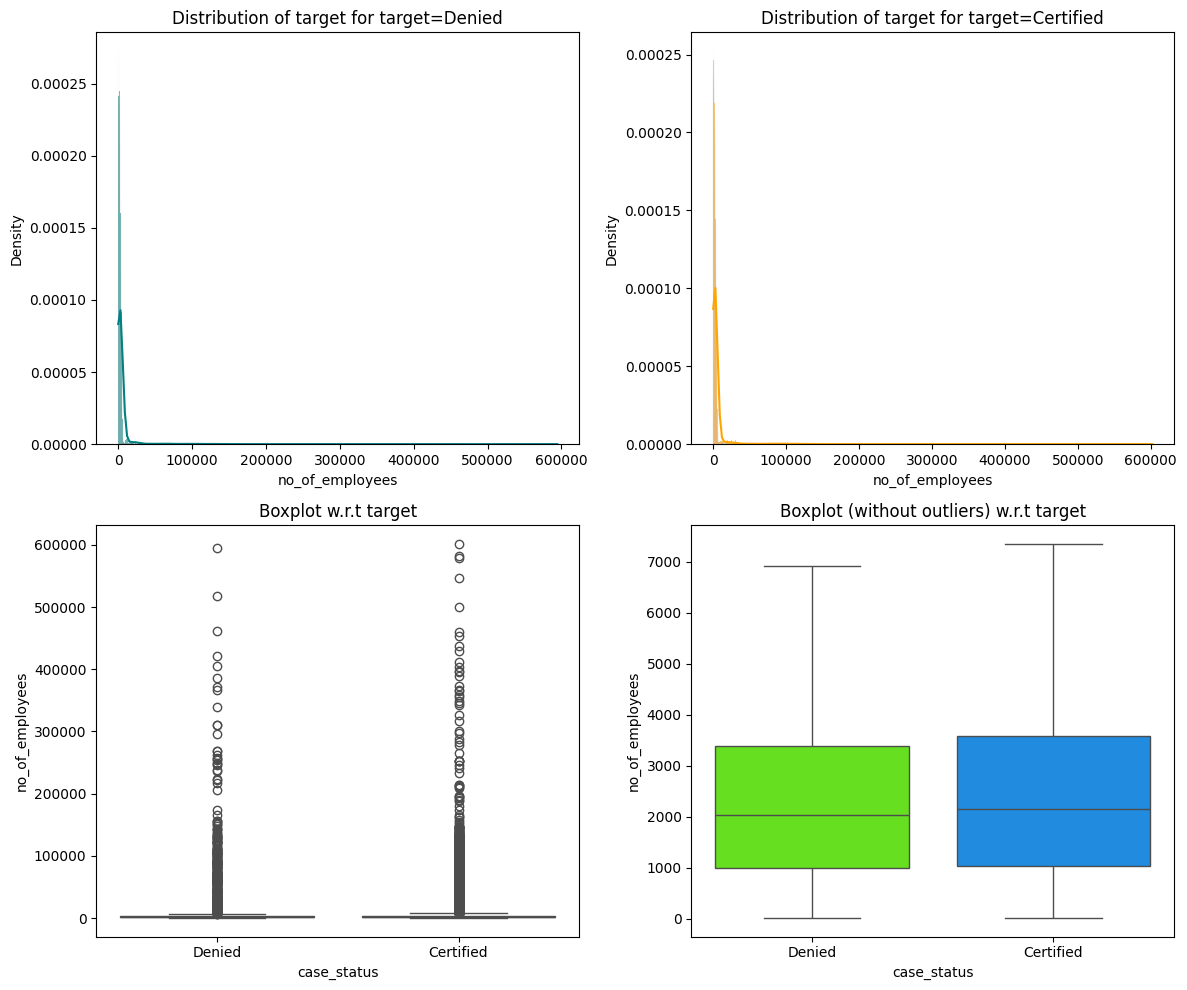

In [92]:
distribution_plot_wrt_target(df_eng, 'no_of_employees', 'case_status')

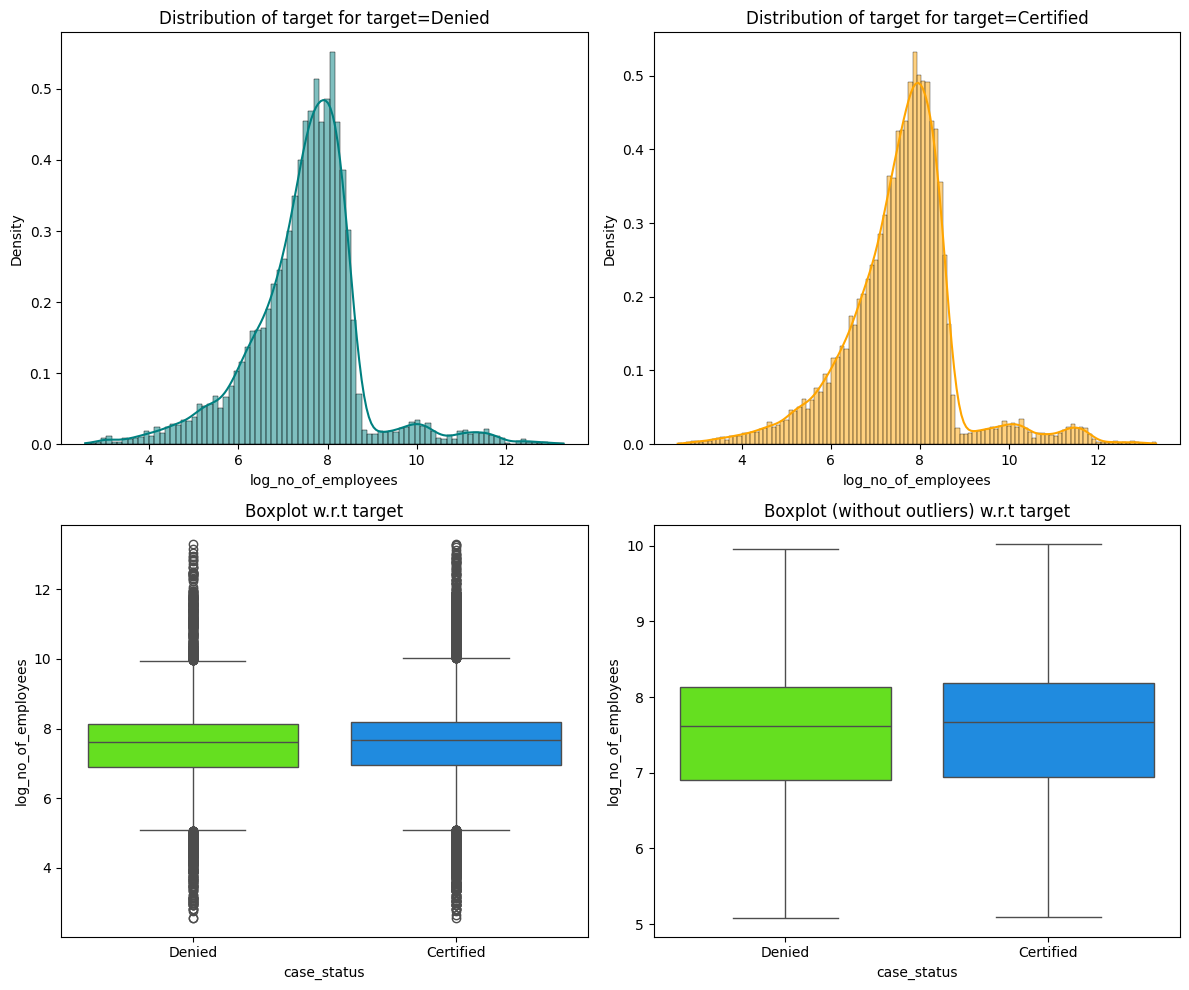

In [93]:
distribution_plot_wrt_target(df_eng, 'log_no_of_employees', 'case_status')

### prevailing_wage → annual_wage → log_annual_wage

**Before**: Extremely skewed, long tail above $300k made the bulk of the data squished at the bottom.

**After log**: Distribution is much more symmetric, main cluster is now visible, and outliers have less leverage while still retaining meaningful differences.

**Looks great**: This will help linear models a lot, and it gives tree models a more balanced spread to split on. The transformation clearly made the feature more interpretable in boxplots and density plots.

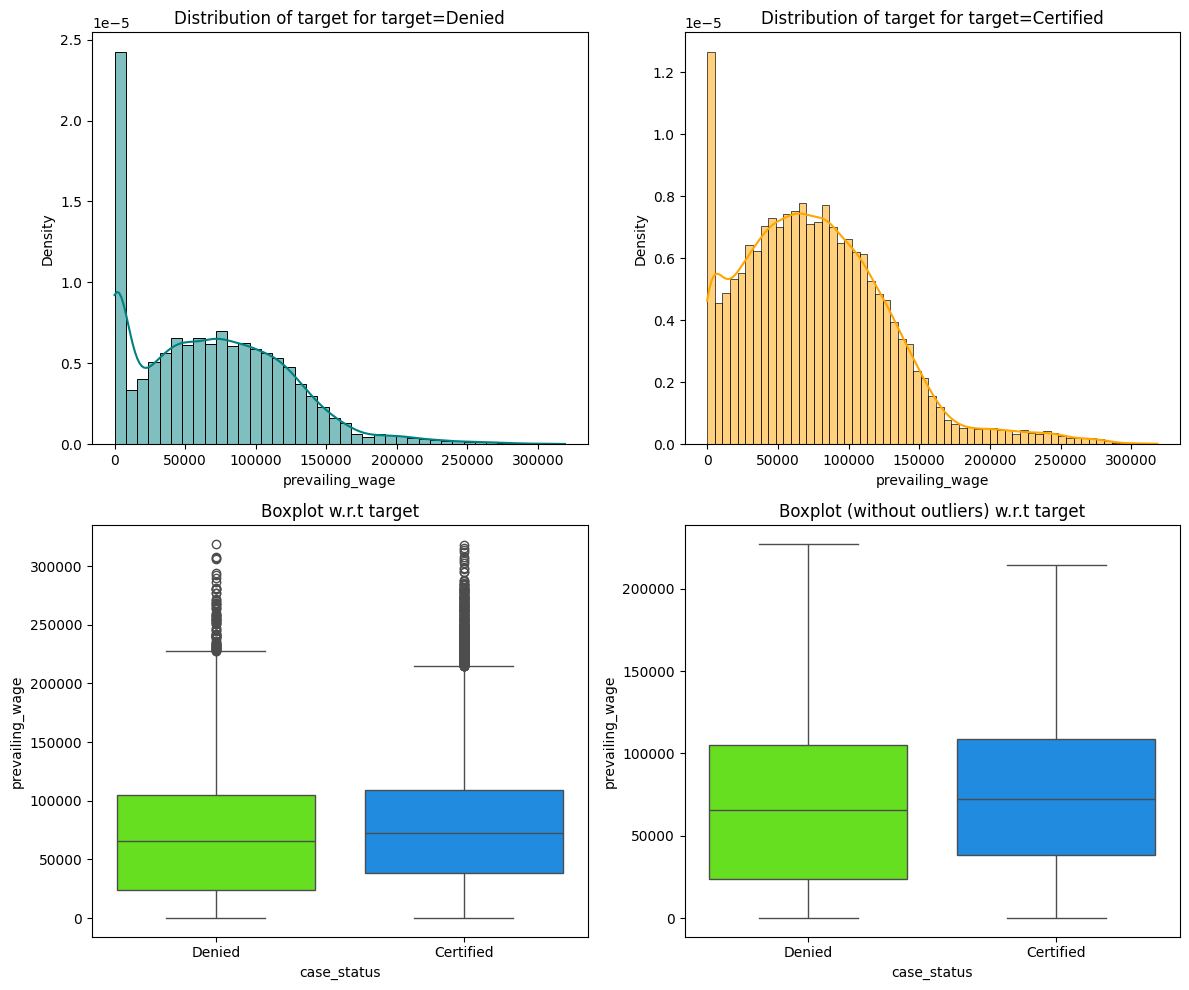

In [98]:
distribution_plot_wrt_target(df_base, 'prevailing_wage', 'case_status')

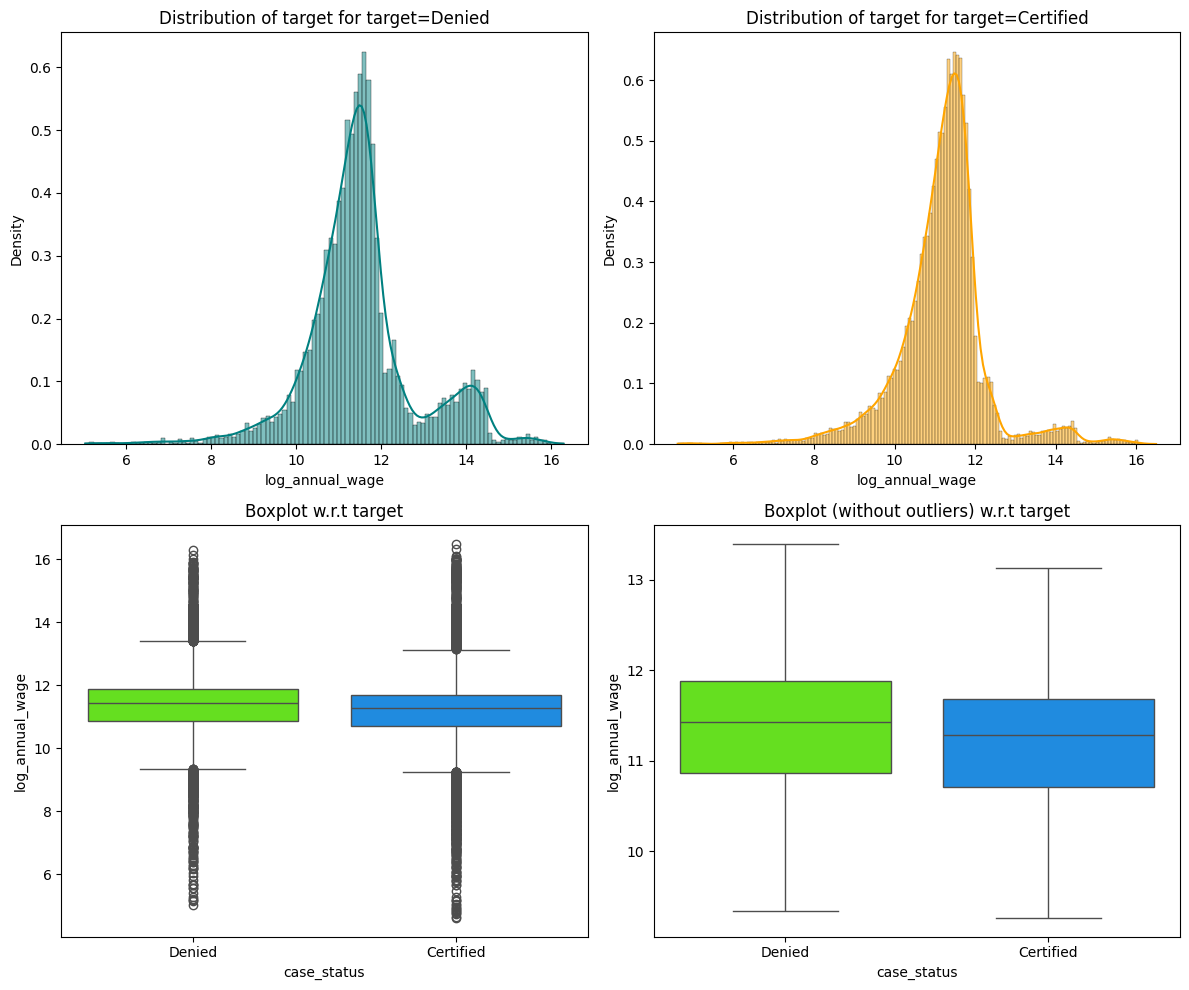

In [85]:
distribution_plot_wrt_target(df_eng, 'log_annual_wage', 'case_status')

### yr_of_estab → company_age

**Before**: Lots of unrealistic old establishment dates, distribution heavily clumped near modern years.

**After**: Converting to age makes the scale interpretable and allows capping (e.g., 200 years). The shape is still skewed, but that’s natural — most companies are young.

**Looks ok**: The skew isn’t harmful to most models, so main gain here is interpretability and ability to spot/fix bad dates.

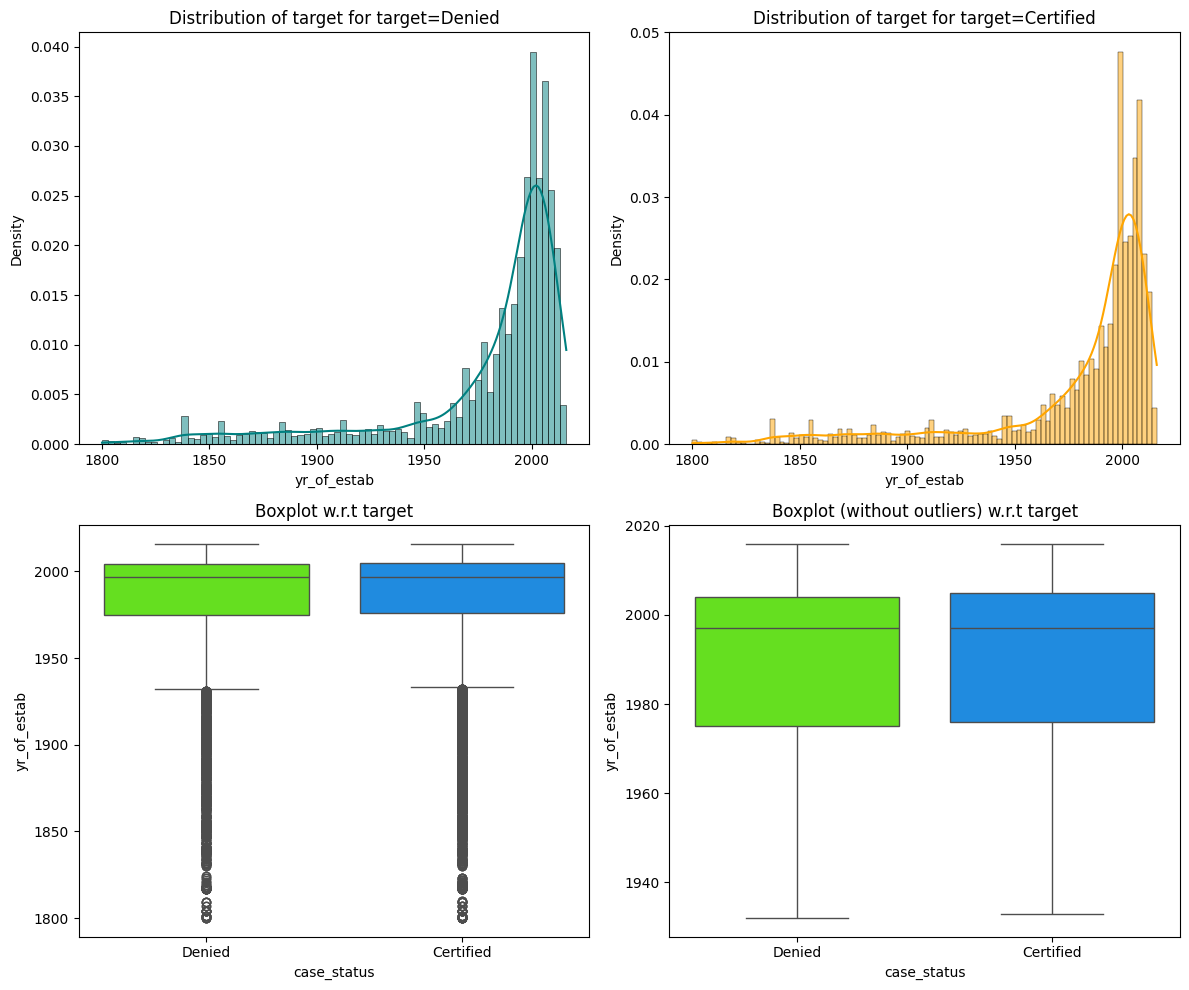

In [99]:
distribution_plot_wrt_target(df_base, 'yr_of_estab', 'case_status')

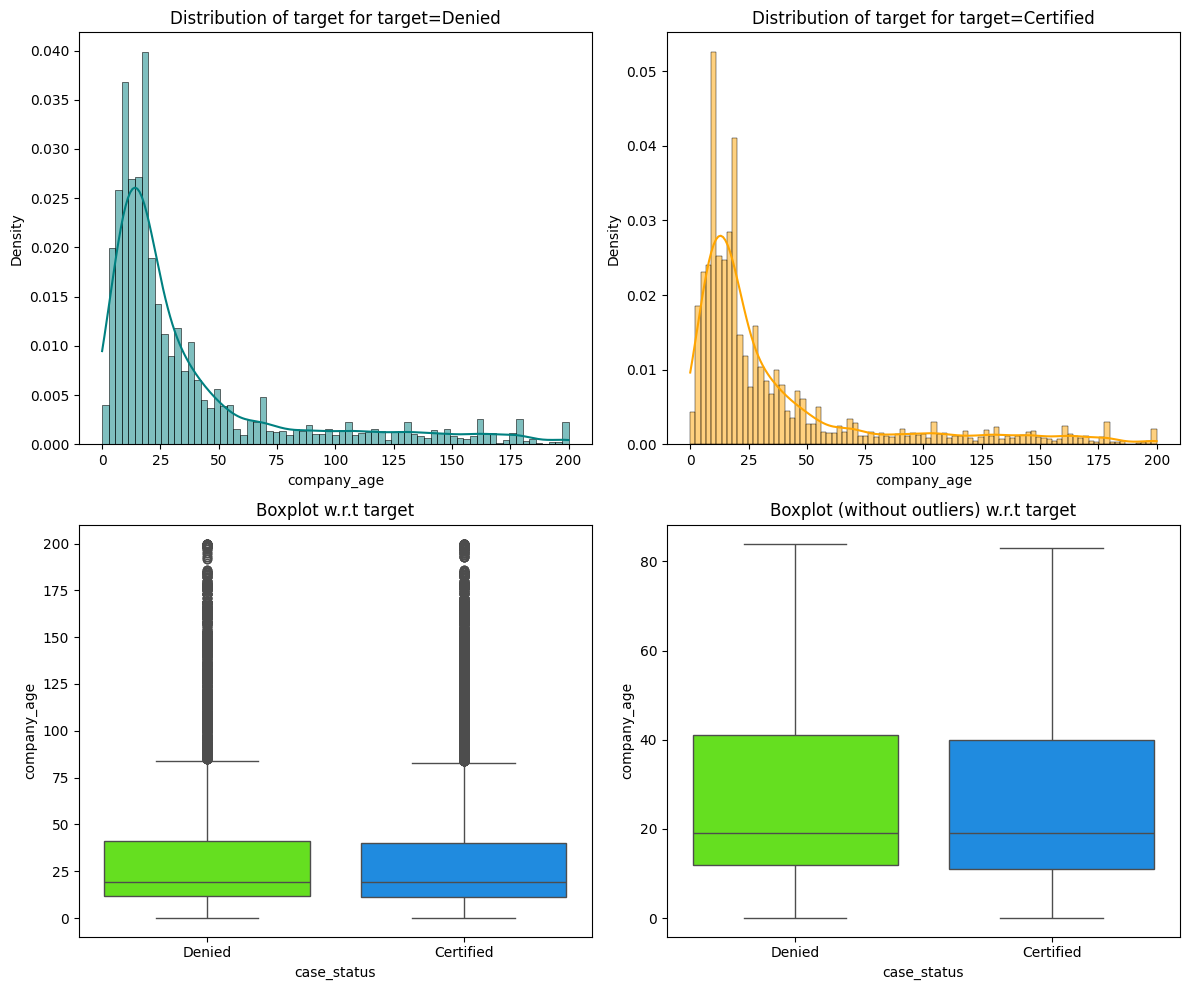

In [96]:
distribution_plot_wrt_target(df_eng, 'company_age', 'case_status')

## Data Preprocessing

### Define features, target, and splits

In [100]:
# Target
y = df['case_status'].map({'Certified': 1, 'Denied': 0}).astype(int)
X = df.drop(columns=['case_status'])

# Feature groups
binary_cols = [c for c in ['has_job_experience','requires_job_training','full_time_position'] if c in X.columns]

categorical_features = [c for c in ['continent','education_of_employee','region_of_employment'] if c in X.columns]

numeric_features = [c for c in [
    'no_of_employees','log_no_of_employees',
    'annual_wage','log_annual_wage',
    'company_age',
    'no_of_employees_was_missing','annual_wage_was_missing'
] if c in X.columns]

print("Binary cols:", binary_cols)
print("Categorical cols:", categorical_features)
print("Numeric cols:", numeric_features)

Binary cols: ['has_job_experience', 'requires_job_training', 'full_time_position']
Categorical cols: ['continent', 'education_of_employee', 'region_of_employment']
Numeric cols: ['no_of_employees']


### Train/test split

In [101]:
from sklearn.model_selection import train_test_split

# Encode target
y_base = df_base['case_status'].map({'Certified': 1, 'Denied': 0})
X_base = df_base.drop(columns=['case_status'])

y_eng  = df_eng['case_status'].map({'Certified': 1, 'Denied': 0})
X_eng  = df_eng.drop(columns=['case_status'])

# Parallel splits
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.2, stratify=y_base, random_state=RANDOM_STATE
)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(
    X_eng, y_eng, test_size=0.2, stratify=y_eng, random_state=RANDOM_STATE
)

print(f"Base split: {Xb_train.shape} / {Xb_test.shape}")
print(f"Eng  split: {Xe_train.shape} / {Xe_test.shape}")


Base split: (20384, 10) / (5096, 10)
Eng  split: (20384, 13) / (5096, 13)


### create Preprocessor

In [102]:
from joblib import Memory
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

mem = Memory("/tmp/skcache", verbose=0)

def build_preprocessor(X: pd.DataFrame):
    binary_cols = [c for c in ['has_job_experience','requires_job_training','full_time_position'] if c in X.columns]
    categorical_features = [c for c in ['continent','education_of_employee','region_of_employment'] if c in X.columns]
    numeric_features = [c for c in [
        'no_of_employees','log_no_of_employees',
        'annual_wage','log_annual_wage',
        'company_age',
        'no_of_employees_was_missing','annual_wage_was_missing'
    ] if c in X.columns]

    print("Binary cols:", binary_cols)
    print("Categorical cols:", categorical_features)
    print("Numeric cols:", numeric_features)

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',  RobustScaler())
    ], memory=mem)

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ], memory=mem)

    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', 'passthrough', binary_cols),
        ],
        remainder='drop'
    )

# Build separate preprocessors for base and engineered
preproc_base = build_preprocessor(Xb_train)
preproc_eng  = build_preprocessor(Xe_train)


Binary cols: ['has_job_experience', 'requires_job_training', 'full_time_position']
Categorical cols: ['continent', 'education_of_employee', 'region_of_employment']
Numeric cols: ['no_of_employees']
Binary cols: ['has_job_experience', 'requires_job_training', 'full_time_position']
Categorical cols: ['continent', 'education_of_employee', 'region_of_employment']
Numeric cols: ['no_of_employees', 'log_no_of_employees', 'annual_wage', 'log_annual_wage', 'company_age', 'no_of_employees_was_missing', 'annual_wage_was_missing']


helper function to run the same model on both

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_dfpair(model_factory):
    """
    model_factory() should return a fresh, unfitted estimator (e.g., GradientBoostingClassifier()).
    Returns (pipe_base, pipe_eng, pd.DataFrame comparison).
    """
    m1 = model_factory()
    m2 = model_factory()

    pipe_base = Pipeline([("preprocessor", preproc_base), ("clf", m1)], memory=mem)
    pipe_eng  = Pipeline([("preprocessor", preproc_eng),  ("clf", m2)], memory=mem)

    pipe_base.fit(Xb_train, yb_train)
    pipe_eng.fit(Xe_train, ye_train)

    def perf_row(name, est, X, y):
        yhat = est.predict(X)
        return dict(dataset=name,
                    accuracy=accuracy_score(y, yhat),
                    precision=precision_score(y, yhat),
                    recall=recall_score(y, yhat),
                    f1=f1_score(y, yhat))

    rows = [
        perf_row("Base (no FE)", pipe_base, Xb_test, yb_test),
        perf_row("Engineered",   pipe_eng,  Xe_test, ye_test),
    ]
    return pipe_base, pipe_eng, pd.DataFrame(rows)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [116]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
# import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline


In [105]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [106]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building: Original vs Oversampled (SMOTE) vs Undersampled

In [164]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

SCORING = {
    "f1": "f1",
    "precision": "precision",
    "recall": "recall",
    "accuracy": "accuracy"
}

# use more reasonable model defaults
# higher n_estimators
# a little bit more depth
# lower learning rates
MODELS = [
    ("Logistic", LogisticRegression(
        solver="liblinear", penalty="l2", C=1.0, max_iter=1000,
        random_state=RANDOM_STATE)),

    ("RandomForest", RandomForestClassifier(
        n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=2,
        n_jobs=-1, random_state=RANDOM_STATE)),

    ("GradientBoosting", GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, subsample=0.8,
        random_state=RANDOM_STATE)),

    ("XGBoost", XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=4,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, reg_alpha=0.0,
        n_jobs=-1, eval_metric="logloss", use_label_encoder=False,
        random_state=RANDOM_STATE)),

    ("AdaBoost", AdaBoostClassifier(
        n_estimators=300, learning_rate=0.5, random_state=RANDOM_STATE)),
]


def quick_cv_table(X, y, dataset_name, preprocessor, sampler):
    rows = []
    for name, clf in MODELS:
        steps = [("preprocessor", preprocessor)]
        if sampler is not None:
            steps.append(("sampler", sampler))
        steps.append(("clf", clf))

        pipe = ImbPipeline(steps, memory=mem)
        cvres = cross_validate(pipe, X, y, scoring=SCORING, cv=cv, n_jobs=-1, return_estimator=False)

        def m(key): return cvres[f"test_{key}"].mean()
        def s(key): return cvres[f"test_{key}"].std()

        rows.append({
            "dataset": dataset_name,
            "sampling": ("Original" if sampler is None
                         else "Oversampled(SMOTE)" if isinstance(sampler, SMOTE) else "Undersampled"),
            "model": name,
            "mean_f1_cv": m("f1"),      "std_f1": s("f1"),
            "precision": m("precision"), "recall": m("recall"),
            "accuracy":  m("accuracy")
        })
    return pd.DataFrame(rows)


In [165]:

# ----- BASE DATASET -----
orig_base  = quick_cv_table(Xb_train, yb_train, "Base",       preproc_base, sampler=None)
over_base  = quick_cv_table(Xb_train, yb_train, "Base",       preproc_base, sampler=SMOTE(random_state=RANDOM_STATE))
under_base = quick_cv_table(Xb_train, yb_train, "Base",       preproc_base, sampler=RandomUnderSampler(random_state=RANDOM_STATE))


In [166]:

# ----- ENGINEERED DATASET -----
orig_eng  = quick_cv_table(Xe_train, ye_train, "Engineered", preproc_eng, sampler=None)
over_eng  = quick_cv_table(Xe_train, ye_train, "Engineered", preproc_eng, sampler=SMOTE(random_state=RANDOM_STATE))
under_eng = quick_cv_table(Xe_train, ye_train, "Engineered", preproc_eng, sampler=RandomUnderSampler(random_state=RANDOM_STATE))


In [167]:

cv_comparison = (pd.concat([orig_base, over_base, under_base, orig_eng, over_eng, under_eng], ignore_index=True)
                 .sort_values(["mean_f1_cv", "precision", "recall"], ascending=[False, False, False]))
display(cv_comparison.head(10))


,dataset,sampling,model,mean_f1_cv,std_f1,precision,recall,accuracy
17,Engineered,Original,GradientBoosting,0.818947,0.006504,0.776238,0.866680,0.744113
2,Base,Original,GradientBoosting,0.816802,0.004293,0.768446,0.871676,0.738864
3,Base,Original,XGBoost,0.815737,0.006309,0.771648,0.865212,0.738962
18,Engineered,Original,XGBoost,0.815624,0.005254,0.775590,0.860070,0.740335
19,Engineered,Original,AdaBoost,0.814832,0.006172,0.757231,0.881959,0.732339
0,Base,Original,Logistic,0.813427,0.004019,0.748081,0.891288,0.726943
15,Engineered,Original,Logistic,0.813148,0.005100,0.753087,0.883649,0.728807
4,Base,Original,AdaBoost,0.811759,0.005050,0.749538,0.885265,0.725814
16,Engineered,Original,RandomForest,0.809683,0.005899,0.770378,0.853239,0.732142
23,Engineered,Oversampled(SMOTE),XGBoost,0.794207,0.005518,0.804121,0.784559,0.728463


In [169]:
def metric_score_table(df, metrics=None, sort_primary="mean_f1_cv"):
    if metrics is None:
        metrics = ["mean_f1_cv", "precision", "recall"]

    out = df.copy()
    for m in metrics:
        mn, mx = out[m].min(), out[m].max()
        # handle constant columns so we don't divide by zero
        out[f"{m}_norm"] = 0.5 if mx == mn else (out[m] - mn) / (mx - mn)
        # optional: quick rank (1 = best)
        out[f"{m}_rank"] = out[m].rank(ascending=False, method="min").astype(int)

    # order purely by F1
    out = out.sort_values([sort_primary],
                          ascending=[False])
    return out

# Example usage
score_table = metric_score_table(cv_comparison)
display(score_table.head(20))

,dataset,sampling,model,mean_f1_cv,std_f1,precision,recall,accuracy,mean_f1_cv_norm,mean_f1_cv_rank,precision_norm,precision_rank,recall_norm,recall_rank
17,Engineered,Original,GradientBoosting,0.818947,0.006504,0.776238,0.866680,0.744113,1.000000,1,0.357657,21,0.891441,6
2,Base,Original,GradientBoosting,0.816802,0.004293,0.768446,0.871676,0.738864,0.976983,2,0.258681,25,0.913478,5
3,Base,Original,XGBoost,0.815737,0.006309,0.771648,0.865212,0.738962,0.965556,3,0.299352,23,0.884962,7
18,Engineered,Original,XGBoost,0.815624,0.005254,0.775590,0.860070,0.740335,0.964350,4,0.349424,22,0.862278,8
19,Engineered,Original,AdaBoost,0.814832,0.006172,0.757231,0.881959,0.732339,0.955854,5,0.116226,26,0.958842,4
0,Base,Original,Logistic,0.813427,0.004019,0.748081,0.891288,0.726943,0.940775,6,0.000000,30,1.000000,1
15,Engineered,Original,Logistic,0.813148,0.005100,0.753087,0.883649,0.728807,0.937785,7,0.063585,28,0.966297,3
4,Base,Original,AdaBoost,0.811759,0.005050,0.749538,0.885265,0.725814,0.922880,8,0.018513,29,0.973426,2
16,Engineered,Original,RandomForest,0.809683,0.005899,0.770378,0.853239,0.732142,0.900610,9,0.283219,24,0.832142,9
23,Engineered,Oversampled(SMOTE),XGBoost,0.794207,0.005518,0.804121,0.784559,0.728463,0.734589,10,0.711822,16,0.529162,11


Resampling seems to have worse results than the original data. None of the resampling helped the models achieve higher F1 than the models trained on the original data.

AdaBoost, GradientBoosting, and XGBoost all came really close on the performance results with only 0.005 F1 point differences.

- **AdaBoost** and even LR model is probably seeing good results due to the lean and simple dataset.
- **GradientBoosting** is seeing good results and showing to be very close to **XGBoost**

The complexity of XGBoost seemingly isn't winning out on GradientBoosting because the dataset is very clean and has little noise.

### Confusion Matrix and Performance on holdout of the top candidate

We will observe the confusion matrix and performance of these top candidates.

In [176]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import clone

def _dataset_from_tag(tag):
    # returns X_train, y_train, X_test, y_test, preprocessor
    if tag == "Base":
        return Xb_train, yb_train, Xb_test, yb_test, preproc_base
    return Xe_train, ye_train, Xe_test, ye_test, preproc_eng

def fit_best_from_table(winner):
    """
    display metrics + confusion matrix, and return (winner_row, pipe).
    """
    Xtr, ytr, Xte, yte, prep = _dataset_from_tag(winner["dataset"])

    # fresh estimator from MODELS list
    name2est = {n: e for (n, e) in MODELS}
    clf = clone(name2est[winner["model"]])

    steps = [("preprocessor", prep)]
    steps.append(("clf", clf))

    pipe = ImbPipeline(steps, memory=mem).fit(Xtr, ytr)

    # show metrics + confusion matrix using helpers
    perf = model_performance_classification_sklearn(pipe, Xte, yte)
    display(perf)
    confusion_matrix_sklearn(pipe, Xte, yte)

    return winner, pipe

In [177]:
# ---- one call does it all ----
# get top 5 from the table score_table
top_5 = score_table.head(5)

def get_perf_and_conf_matrix(winner):
    """
    display metrics + confusion matrix, and return (winner_row, pipe).
    """
    # print model details
    print(f"Dataset: {winner['dataset']}")
    print(f"Model: {winner['model']}")
    print(f"Sampling: {winner['sampling']}")
    winner_row, best_pipe = fit_best_from_table(winner)

Dataset: Engineered
Model: GradientBoosting
Sampling: Original


,Accuracy,Recall,Precision,F1
0,0.73646,0.867509,0.76801,0.814733


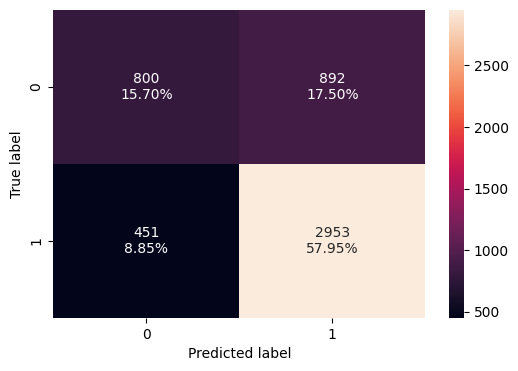

In [178]:
get_perf_and_conf_matrix(top_5.iloc[0])

Dataset: Engineered
Model: XGBoost
Sampling: Original


,Accuracy,Recall,Precision,F1
0,0.734105,0.864277,0.767145,0.812819


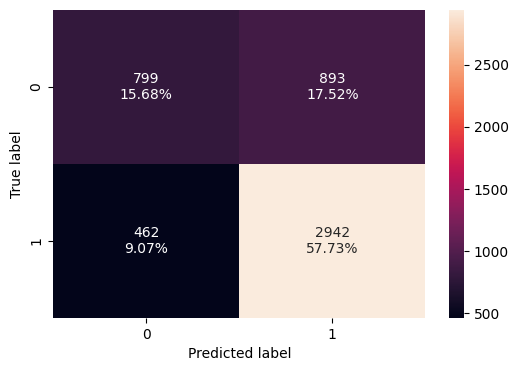

In [181]:
get_perf_and_conf_matrix(top_5.iloc[3])

Dataset: Engineered
Model: AdaBoost
Sampling: Original


/root/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Recall,Precision,F1
0,0.720565,0.877203,0.747996,0.807463


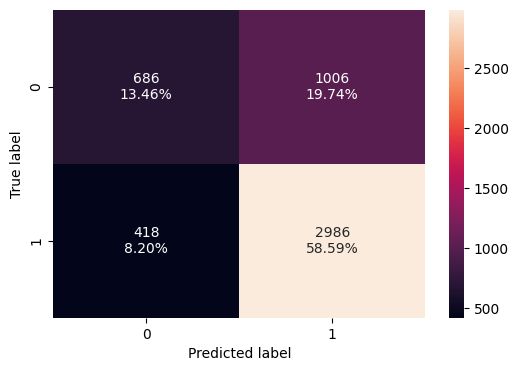

In [182]:
get_perf_and_conf_matrix(top_5.iloc[4])

## Hyperparameter Tuning

Here I frame the CV and GridSearch into reusable functions

This way it's easy to use but also I avoid accidental data leaks

In [183]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
f1_scorer = make_scorer(f1_score)  # positive class = 1

def run_random_search(name, pipe, param_distributions, X, y, n_iter=60, scoring=f1_scorer, cv=cv, random_state=RANDOM_STATE, verbose=1, tag="Notes"):
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring=scoring,
        refit=True,
        cv=cv,
        n_jobs=-1,
        verbose=verbose,
        random_state=random_state
    )
    search.fit(X, y)
    row = {
    "model": name,
    "variant": tag,
    "best_f1_cv": search.best_score_,
    "best_params": search.best_params_}
    return search, pd.DataFrame([row])

def run_grid_search(name, pipe, param_grid, X, y, scoring=f1_scorer, cv=cv, verbose=1, tag="Notes"):
    search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scoring,
        refit=True,
        cv=cv,
        n_jobs=-1,
        verbose=verbose
    )
    search.fit(X, y)
    row = {"model": name, "variant": tag, "best_f1_cv": search.best_score_, "best_params": search.best_params_}
    return search, pd.DataFrame([row])

def eval_on_test(name, est, X_test, y_test, tag):
    yp = est.predict(X_test)
    return {
        "model": name, "variant": tag,
        "accuracy": accuracy_score(y_test, yp),
        "precision": precision_score(y_test, yp),
        "recall": recall_score(y_test, yp),
        "f1": f1_score(y_test, yp)
    }


**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

AdaBoost results were pretty good in the default model + resampling comparisons.

In [203]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_eng),
        ("clf", AdaBoostClassifier(
            estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
            algorithm="SAMME.R",
            random_state=RANDOM_STATE
        )),
    ],
    memory=mem
)

ada_grid_notes = [
    {"clf__estimator__max_depth": [1],
     "clf__learning_rate": [1.0, 0.5],
     "clf__n_estimators": [50, 75, 85, 100]},
    {"clf__estimator__max_depth": [1, 2],
     "clf__learning_rate": [0.5, 0.1],
     "clf__n_estimators": [75, 100, 125, 150]},
    {"clf__estimator__max_depth": [1, 2, 3],
     "clf__learning_rate": [0.1, 0.01],
     "clf__n_estimators": [100, 125, 150]},
]

ada_notes_search, ada_notes_summary = run_grid_search("AdaBoost", ada_pipe, ada_grid_notes, Xe_train, ye_train, tag="Eng-Notes")
best_ada_notes = ada_notes_search.best_estimator_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [222]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_base_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_base),
        ("clf", AdaBoostClassifier(
            estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
            algorithm="SAMME.R",
            random_state=RANDOM_STATE
        )),
    ],
    memory=mem
)

ada_grid_notes = [
    {"clf__estimator__max_depth": [1],
     "clf__learning_rate": [1.0, 0.5],
     "clf__n_estimators": [50, 75, 85, 100]},
    {"clf__estimator__max_depth": [1, 2],
     "clf__learning_rate": [0.5, 0.1],
     "clf__n_estimators": [75, 100, 125, 150]},
    {"clf__estimator__max_depth": [1, 2, 3],
     "clf__learning_rate": [0.1, 0.01],
     "clf__n_estimators": [100, 125, 150]},
]

ada_base_notes_search, ada_base_notes_summary = run_grid_search("AdaBoost", ada_base_pipe, ada_grid_notes, Xb_train, yb_train, tag="Base-Notes")
best_ada_base_notes = ada_base_notes_search.best_estimator_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

GradientBoosting results were one of the best during default model comparison.

I've done some tweaking but results ended up being worse so I kept the first attempt. I've added another result from using the base dataset instead of my log transformed dataset just as a baseline comparison.

In [204]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_eng),
        ("clf", GradientBoostingClassifier(random_state=RANDOM_STATE))
    ],
    memory=mem
)

# NOTES dist
gb_dist_notes = {
    "clf__n_estimators": [100, 200, 300, 500],
    "clf__learning_rate": [0.1, 0.05, 0.01, 0.005],
    "clf__subsample": [0.7, 0.8, 0.9, 1.0],
    "clf__max_depth": [2, 3, 4],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2", 0.3, 0.5]
}
gb_notes_search, gb_notes_summary = run_random_search("GradientBoosting", gb_pipe, gb_dist_notes, Xe_train, ye_train, n_iter=40, tag="Eng-Notes")
best_gb_notes = gb_notes_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [205]:
from sklearn.ensemble import GradientBoostingClassifier

gb_base_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_base),
        ("clf", GradientBoostingClassifier(random_state=RANDOM_STATE))
    ],
    memory=mem
)

# NOTES dist
gb_base_dist_notes = {
    "clf__n_estimators": [100, 200, 300, 500],
    "clf__learning_rate": [0.1, 0.05, 0.01, 0.005],
    "clf__subsample": [0.7, 0.8, 0.9, 1.0],
    "clf__max_depth": [2, 3, 4],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2", 0.3, 0.5]
}
gb_base_notes_search, gb_base_notes_summary = run_random_search("GradientBoosting", gb_base_pipe, gb_base_dist_notes, Xb_train, yb_train, n_iter=40, tag="Base-Notes")
best_gb_base_notes = gb_base_notes_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [ ]:

# Focused search space (narrowed around the good region)
gb_dist_tweak = {
    # more trees, smaller LR
    "clf__n_estimators":      [400, 600, 800, 1000, 1200],
    "clf__learning_rate":     [0.05, 0.03, 0.02, 0.01],

    # shallow trees + enough estimators
    "clf__max_depth":         [2, 3],
    "clf__min_samples_leaf":  [2, 4, 8],
    "clf__min_samples_split": [5, 10, 20],

    # stochastic GB for generalization
    "clf__subsample":         [0.5, 0.7, 0.8, 0.9],
    "clf__max_features":      [None, "sqrt", "log2", 0.5, 0.8],

    # mild post-pruning
    "clf__ccp_alpha":         [0.0, 1e-4, 1e-3],

    # loss variants: log_loss by default; exponential for noisier labels
    "clf__loss":              ["log_loss", "exponential"],
}

gb_tweak_search, gb_tweak_summary = run_random_search(
    "GradientBoosting",
    gb_pipe,
    gb_dist_tweak,
    Xe_train, ye_train,
    n_iter=80,
    tag="Eng-Tweak"
)
best_gb_tweak = gb_tweak_search.best_estimator_

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

XGBoost also performed well before, but there are higher expectations due to the technical complexity of this library.

The baseline suggestions that came with the notebook didn't do very well.

I've made some tweaks that did perform better.
I didn't go any further in fine tuning but I added the model using base dataset as a comparison.

In [202]:
from xgboost import XGBClassifier

pos = int((ye_train == 1).sum()); neg = int((ye_train == 0).sum())
spw = neg / max(pos, 1)

xgb_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_eng),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=RANDOM_STATE,
            n_jobs=-1,
            use_label_encoder=False,
            scale_pos_weight=spw
        ))
    ],
    memory=mem
)

# NOTES dist
xgb_dist_notes = {
    "clf__n_estimators": [50, 75, 100, 125, 150, 200, 250],
    "clf__learning_rate": [0.1, 0.05, 0.01],
    "clf__subsample": [0.5, 0.7, 0.8, 1.0],
    "clf__gamma": [0, 1, 3, 5, 8],
    "clf__colsample_bytree": [0.3, 0.5, 0.7, 1.0],
    "clf__colsample_bylevel": [0.3, 0.5, 0.7, 1.0],
    "clf__max_depth": [3, 4, 5, 6]
}
xgb_notes_search, xgb_notes_summary = run_random_search("XGBoost", xgb_pipe, xgb_dist_notes, Xe_train, ye_train, n_iter=60, tag="Eng-Notes")
best_xgb_notes = xgb_notes_search.best_estimator_



Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [211]:
from xgboost import XGBClassifier

pos = int((yb_train == 1).sum()); neg = int((yb_train == 0).sum())
spw = neg / max(pos, 1)

xgb_base_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_eng),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=RANDOM_STATE,
            n_jobs=-1,
            use_label_encoder=False,
            scale_pos_weight=spw
        ))
    ],
    memory=mem
)

# NOTES dist
xgb_base_dist_notes = {
    "clf__n_estimators": [50, 75, 100, 125, 150, 200, 250],
    "clf__learning_rate": [0.1, 0.05, 0.01],
    "clf__subsample": [0.5, 0.7, 0.8, 1.0],
    "clf__gamma": [0, 1, 3, 5, 8],
    "clf__colsample_bytree": [0.3, 0.5, 0.7, 1.0],
    "clf__colsample_bylevel": [0.3, 0.5, 0.7, 1.0],
    "clf__max_depth": [3, 4, 5, 6]
}
xgb_base_notes_search, xgb_base_notes_summary = run_random_search("XGBoost", xgb_base_pipe, xgb_base_dist_notes, Xe_train, ye_train, n_iter=60, tag="Base-Notes")
best_xgb_base_notes = xgb_base_notes_search.best_estimator_



Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [206]:
xgb_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_eng),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=RANDOM_STATE,
            n_jobs=1,
            use_label_encoder=False
            # scale_pos_weight  # <-- dropped (positives are majority)
        ))
    ],
    memory=mem
)

xgb_dist_tweak = {
    "clf__n_estimators": [200, 300, 400, 500],             # slightly wider
    "clf__learning_rate": [0.08, 0.06, 0.05, 0.04],        # tighter slower rates
    "clf__max_depth": [4, 5, 6],                           # around sweet spot
    "clf__min_child_weight": [1, 2, 4],                    # balances bias/variance
    "clf__subsample": [0.7, 0.75, 0.8],                    # around best 0.75
    "clf__colsample_bytree": [0.7, 0.8, 0.9],               # slightly narrower
    "clf__gamma": [0, 0.1, 0.2, 0.3],                      # finer increments
    "clf__reg_lambda": [5, 10, 15],                        # centered on 10
    "clf__reg_alpha": [0, 0.001, 0.01],                    # small L1
}

xgb_better_search, xgb_better_summary = run_random_search(
    "XGBoost", xgb_pipe, xgb_dist_tweak, Xe_train, ye_train,
    n_iter=60, scoring=f1_scorer, tag="Eng-Tweaked"
)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [207]:
xgb_base_pipe = Pipeline(
    steps=[
        ("preprocessor", preproc_base),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=RANDOM_STATE,
            n_jobs=1,
            use_label_encoder=False
            # scale_pos_weight  # <-- dropped (positives are majority)
        ))
    ],
    memory=mem
)

xgb_base_better_search, xgb_base_better_summary = run_random_search(
    "XGBoost", xgb_base_pipe, xgb_dist_tweak, Xb_train, yb_train,
    n_iter=60, scoring=f1_scorer, tag="Base-Tweaked"
)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


## Model Performance Summary and Final Model Selection

In [223]:
summaries = [
    ada_notes_summary,
    ada_base_notes_summary,
    ada_tweak_summary,
    gb_notes_summary,
    gb_base_notes_summary,
    gb_tweak_summary,
    xgb_notes_summary,
    xgb_base_notes_summary,
    xgb_better_summary,
    xgb_base_better_summary
]


leaderboard = (
    pd.concat(summaries, ignore_index=True)
      .sort_values(["best_f1_cv"], ascending=False)
      .reset_index(drop=True)
)
display(leaderboard)

,model,variant,best_f1_cv,best_params
0,GradientBoosting,Eng-Notes,0.821871,"{'clf__subsample': 1.0, 'clf__n_estimators': 3..."
1,XGBoost,Eng-Tweaked,0.820533,"{'clf__subsample': 0.7, 'clf__reg_lambda': 5, ..."
2,GradientBoosting,Base-Notes,0.819710,"{'clf__subsample': 1.0, 'clf__n_estimators': 3..."
3,AdaBoost,Eng-Notes,0.819178,"{'clf__estimator__max_depth': 3, 'clf__learnin..."
4,XGBoost,Base-Tweaked,0.817333,"{'clf__subsample': 0.7, 'clf__reg_lambda': 5, ..."
5,AdaBoost,Base-Notes,0.817103,"{'clf__estimator__max_depth': 3, 'clf__learnin..."
6,XGBoost,Eng-Notes,0.792838,"{'clf__subsample': 1.0, 'clf__n_estimators': 7..."
7,XGBoost,Base-Notes,0.792838,"{'clf__subsample': 1.0, 'clf__n_estimators': 7..."


You can see here that all models performed relatively well showing the benefits of Boosting. There was no benefit from resampling so that wasn't used here at all but the models are performing well.

The variant explanation:
**Eng - engineered dataset** - this is the dataset that includes the engineered features of numerical features with log transformation
**Base - base dataset** - this is the base dataset with minimal data cleaning and no addition of features involved.
**Notes - notebook suggestions** - this is the variant that uses the RandomizedSearch or GridSearch parameter grid suggested by the notebook
**Tweaked - tweaked parameter grid** - this is the variant that has some tweaked RandomizedSearch or GridSearch parameter grid to try to optimize the model with my own exploration

GradientBoosting came out on top again here, and XGBoost with some tweaks to the RandomizedSearch is performing just as well.

The Base dataset comparison with the Eng (engineered dataset)

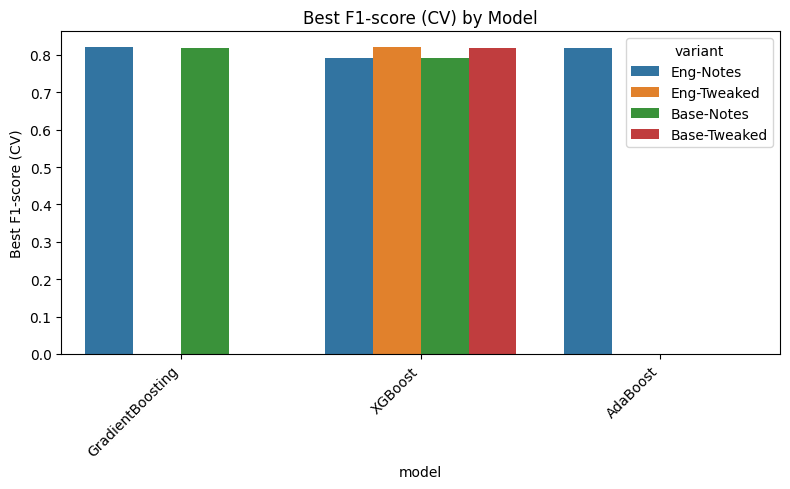

In [216]:
# Visualize best_f1_cv scores by model
plt.figure(figsize=(8, 5))
sns.barplot(data=leaderboard, x='model', y='best_f1_cv', hue='variant')
plt.title('Best F1-score (CV) by Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Best F1-score (CV)')
plt.tight_layout()
plt.show()

You can see from the graph that the best performing AdaBoost, GradientBoosting,XGBoost are pretty much neck and neck.

I am hand picking the two finalists:
- GradientBoosting	Eng-Notes
- XGBoost	Eng-Tweaked

and comparing their performance results against the holdout testing data.


### Final Performance comparisons

In [210]:
# Evaluate best models on test set
test_results = []

# Best GradientBoosting model from notes search
test_results.append(eval_on_test(
    "GradientBoosting", best_gb_notes, Xe_test, ye_test, "Eng-Notes"
))

# Best XGBoost model from tweaked search
test_results.append(eval_on_test(
    "XGBoost", xgb_better_search.best_estimator_, Xe_test, ye_test, "Eng-Tweaked"
))


test_leaderboard = (
    pd.DataFrame(test_results)
    .sort_values("f1", ascending=False)
    .reset_index(drop=True)
)

display(test_leaderboard)

,model,variant,accuracy,precision,recall,f1
0,XGBoost,Eng-Tweaked,0.737049,0.769733,0.865159,0.814661
1,GradientBoosting,Eng-Notes,0.735086,0.765101,0.870740,0.814509


F1 difference has no meaningful gap
Precision and Recall has a little bit of trade-off
- XGBoost has slightly higher precision
- GradientBoosting has slightly higher recall

Since the business goal is to balance FP/FN, neither can be said to clearly dominate.

Accuracy difference is also negligible...


### Recommendation and Final model pick


**XGBoost** has faster prediction speed, better scaling on large data, and more hyperparameter flexibility for future tuning.

**GradientBoosting** has simplicity, smaller dependency footprint, and slightly easier interpretability.


I am picking the **XGBoost** model as the final model for its slight precision edge.

## Actionable Insights and Recommendations

### Actionable Insights
1. **Wage - Feature Engineering Impact**  
   - The engineered dataset outperformed the base dataset across most models, confirming that the added log transformed numerical features capture meaningful signal for visa certification prediction.
   - This confirms that wage distribution patterns contain valuable signals for certification likelihood and should remain part of future models.

2. **Best-Performing Model Families**  
   - Boosting techniques like `AdaBoost`, `GradientBoosting`, and `XGBoost` all performed very well with this prediction.
   - Best models balanced recall above `86%` and precision above `76%` while maintaining F1 (`0.81 or higher`).

3. **Sampling Not Needed at Current State**
   - Resampling was seen to hurt the performance of the model and was deemed not necessary for this particular dataset, most likely due to small size and simplicity of the dataset.
   - Focus should remain on feature quality rather than balancing

4. **Business Metric Alignment**  
   - For visa processing, **recall is critical**! Missed approval can lose high-value candidates (focus on reducing **false negatives**)
   - But **low precision** should be avoided to prevent wasted time on manual reviews (from **false positives**).
   - Tune and maintain high recall with precision above 75.

---

### Recommendations
1. **Final Model Choice**  
   - Use: **XGBoost** (without `scale_pos_weight`) trained on engineered features
   - Why: provides the **best F1** while keeping **recall high** and workload from precision *manageable*.

2. **Next Steps**  
   - Conduct **threshold tuning** on the validation set to find the optimal recall–precision balance based on operational needs.
   - Collect feedback from visa processing teams to define acceptable trade-offs.

3. **Continuous monitoring**
   - Track F1, recall, and precision monthly to detect performance drift.
   - Retrain and redeploy when metrics trend downward of agreed minimum, for example:
      - F1 < 80%
      - recall < 85%
      - precision < 74%

3. **Further Data Improvements**  
   - Collect additional features:
      - Applicant profile
      - Employer visa track record
      - Employer growth and stability metrics
   - Include fairness-related attributes (like demographics, country of origin, income range threshold) to ensure ethical and auditable decision making.
   - More data could further boost model accuracy and reduce burdens of manual intervention.

4. **Prepare for Future Imbalance**
   - If approval rates shift over time, re-explore imbalance-handling techniques or revisit XGBoost’s `scale_pos_weight` (currently not used) parameter.


<font size=6 color='blue'>Power Ahead</font>
___

## Exporting Notebook

In [249]:
!jupyter nbconvert --to html "/content/out/EasyVisa_Full_Code_Notebook.ipynb" \
  --output "/content/out/EasyVisa_Full_Code_Notebook.html"

[NbConvertApp] Converting notebook /content/out/EasyVisa_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 2015592 bytes to /content/out/EasyVisa_Full_Code_Notebook.html
